Problem Statement:

Being a data scientist at a multinational corporation, the HR team provided you an extensive data of the employees and request you to develop a model that could predict which employees are more likely to quit.

Here we have used the exploratory data analysis, feature scaling followed by multiple classification models like Logistic Regression, Decision Tree Classifier and Random Forest Classifier to classify whether the person will continue with the company or quit.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the dataset

df = pd.read_csv("C:/Users/punam/OneDrive/Desktop/Punam/Taskimpetus/Labs/Source/ML/CaseStudy1/Human_Resources.csv")

In [3]:
# Check the first few rows to get an idea of the dataset
df.head(4).T

,0,1,2,3
Age,41,49,37,33
Attrition,Yes,No,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently
DailyRate,1102,279,1373,1392
Department,Sales,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3
Education,2,1,2,4
EducationField,Life Sciences,Life Sciences,Other,Life Sciences
EmployeeCount,1,1,1,1
EmployeeNumber,1,2,4,5


In [4]:
# Check the dataset for number of rows and columns
df.shape

(1470, 35)

In [5]:
# Check the column names at a glance
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Check the datatypes using .dtypes() or you can have more general information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1. We find a number of columns with object datatype namely: Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime
2. There are no null values visible.  df.isnull().sum()

In [7]:
# Retrieve the statistical information of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


1. It is observed that DailyRate,MonthlyIncome amd MonthlyRate have a very high std. which indicates high variation.
2. On the contrary, EmployeeCount, StandardHours have zero standard deviation which indicates zero variance. This means these columns do not provide us with any information and therefore we should drop them.

In [8]:
# Check for statistical information of the object datatype
df.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


3. All the employees are Over18 years of age. So this column also does not provide with any other information hence we can safely drop it.
4. 'Attrition' is our Target column and it has 2 unique values, with 'No' has a higher frequency which indicates that majority of the employees 'Do Not Leave' the company.

In [9]:
# drop the columns which do not provide any information
df.drop(['Over18','EmployeeCount','StandardHours'], axis=1, inplace= True)

In [10]:
#Check the change in shape after dropping
df.shape

(1470, 32)

In [11]:
# Check for the unique values of our target column
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

The target column has two unique values  i.e. Yes and No. This leads to Binary Class Classification.

In [12]:
# Check for the number of employees who have left the company
left = df[df['Attrition']=='Yes'].shape[0]  # .shape[0] provides us with the number of rows where 'Attrition' is 'Yes'.

In [13]:
print('{} employees left the company.'.format(left))

237 employees left the company.


In [14]:
# Check for the values of Attrition and Overtime before converting them into integer data 
df[['Attrition','OverTime']]

,Attrition,OverTime
0,Yes,Yes
1,No,No
2,Yes,Yes
3,No,Yes
4,No,No
...,...,...
1465,No,No
1466,No,No
1467,No,Yes
1468,No,No


In [15]:
# Write a function to convert 'Yes' == 1 and 'No' == 0
def ConvertToZeroOrOne(x):
    if x.lower() =='yes':    
        return 1
    else:
        return 0

In [16]:
# Try converting the Attrition column to 0s and 1s
df_new = df['Attrition'].apply(ConvertToZeroOrOne)
# This would mean if Attrition =0, then the employee is still working for the company.

In [17]:
df_new

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [18]:
# Let us also apply lambda function to do the same conversion of 0s and 1s like above (This time I'm making the changes in the original dataset.)
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda a: 1 if a=='Yes' else 0)

In [19]:
# Let us view the change
df.head(4).T

,0,1,2,3
Age,41,49,37,33
Attrition,1,0,1,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently
DailyRate,1102,279,1373,1392
Department,Sales,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3
Education,2,1,2,4
EducationField,Life Sciences,Life Sciences,Other,Life Sciences
EmployeeNumber,1,2,4,5
EnvironmentSatisfaction,2,3,4,4


In [20]:
# Pandas dataframe.groupby() function is used to split the data into groups based on some criteria.
grpAge = df.groupby(['Age'])

In [21]:
# Let's print the first entries in all the groups formed using .first()
grpAge.first().head(4)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
18,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,3,Male,...,3,3,0,0,2,3,0,0,0,0
19,1,Travel_Rarely,528,Sales,22,1,Marketing,167,4,Male,...,3,4,0,0,2,2,0,0,0,0
20,1,Travel_Frequently,871,Research & Development,6,3,Life Sciences,137,4,Female,...,3,2,0,1,5,3,1,0,1,0
21,0,Travel_Rarely,391,Research & Development,15,2,Life Sciences,30,3,Male,...,3,4,0,0,6,3,0,0,0,0


In [22]:
# Let’s print the value contained in any one of the groups using the function .get_group() 
grpAge.get_group(18)   # Here we have called the values contained in age group 18

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
296,18,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,3,...,3,3,0,0,2,3,0,0,0,0
301,18,0,Travel_Rarely,812,Sales,10,3,Medical,411,4,...,3,1,0,0,2,3,0,0,0,0
457,18,1,Travel_Frequently,1306,Sales,5,3,Marketing,614,2,...,3,4,0,0,3,3,0,0,0,0
727,18,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,...,3,4,0,0,2,3,0,0,0,0
828,18,1,Non-Travel,247,Research & Development,8,1,Medical,1156,3,...,3,4,0,0,0,3,0,0,0,0
972,18,0,Non-Travel,1124,Research & Development,1,3,Life Sciences,1368,4,...,3,3,0,0,5,4,0,0,0,0
1153,18,1,Travel_Frequently,544,Sales,3,2,Medical,1624,2,...,3,3,0,0,2,4,0,0,0,0
1311,18,0,Non-Travel,1431,Research & Development,14,3,Medical,1839,2,...,3,3,0,0,4,1,0,0,0,0


In [23]:
# Let's use .groupby() function to form groups based on more than one category to perform the splitting. Additionally, .size() gives us the number of instances falling in this union.
df.groupby(['Age','Attrition']).size()

Age  Attrition
18   0             4
     1             4
19   0             3
     1             6
20   0             5
                  ..
57   0             4
58   0             9
     1             5
59   0            10
60   0             5
Length: 82, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'OverTime'}>],
       [<Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title=

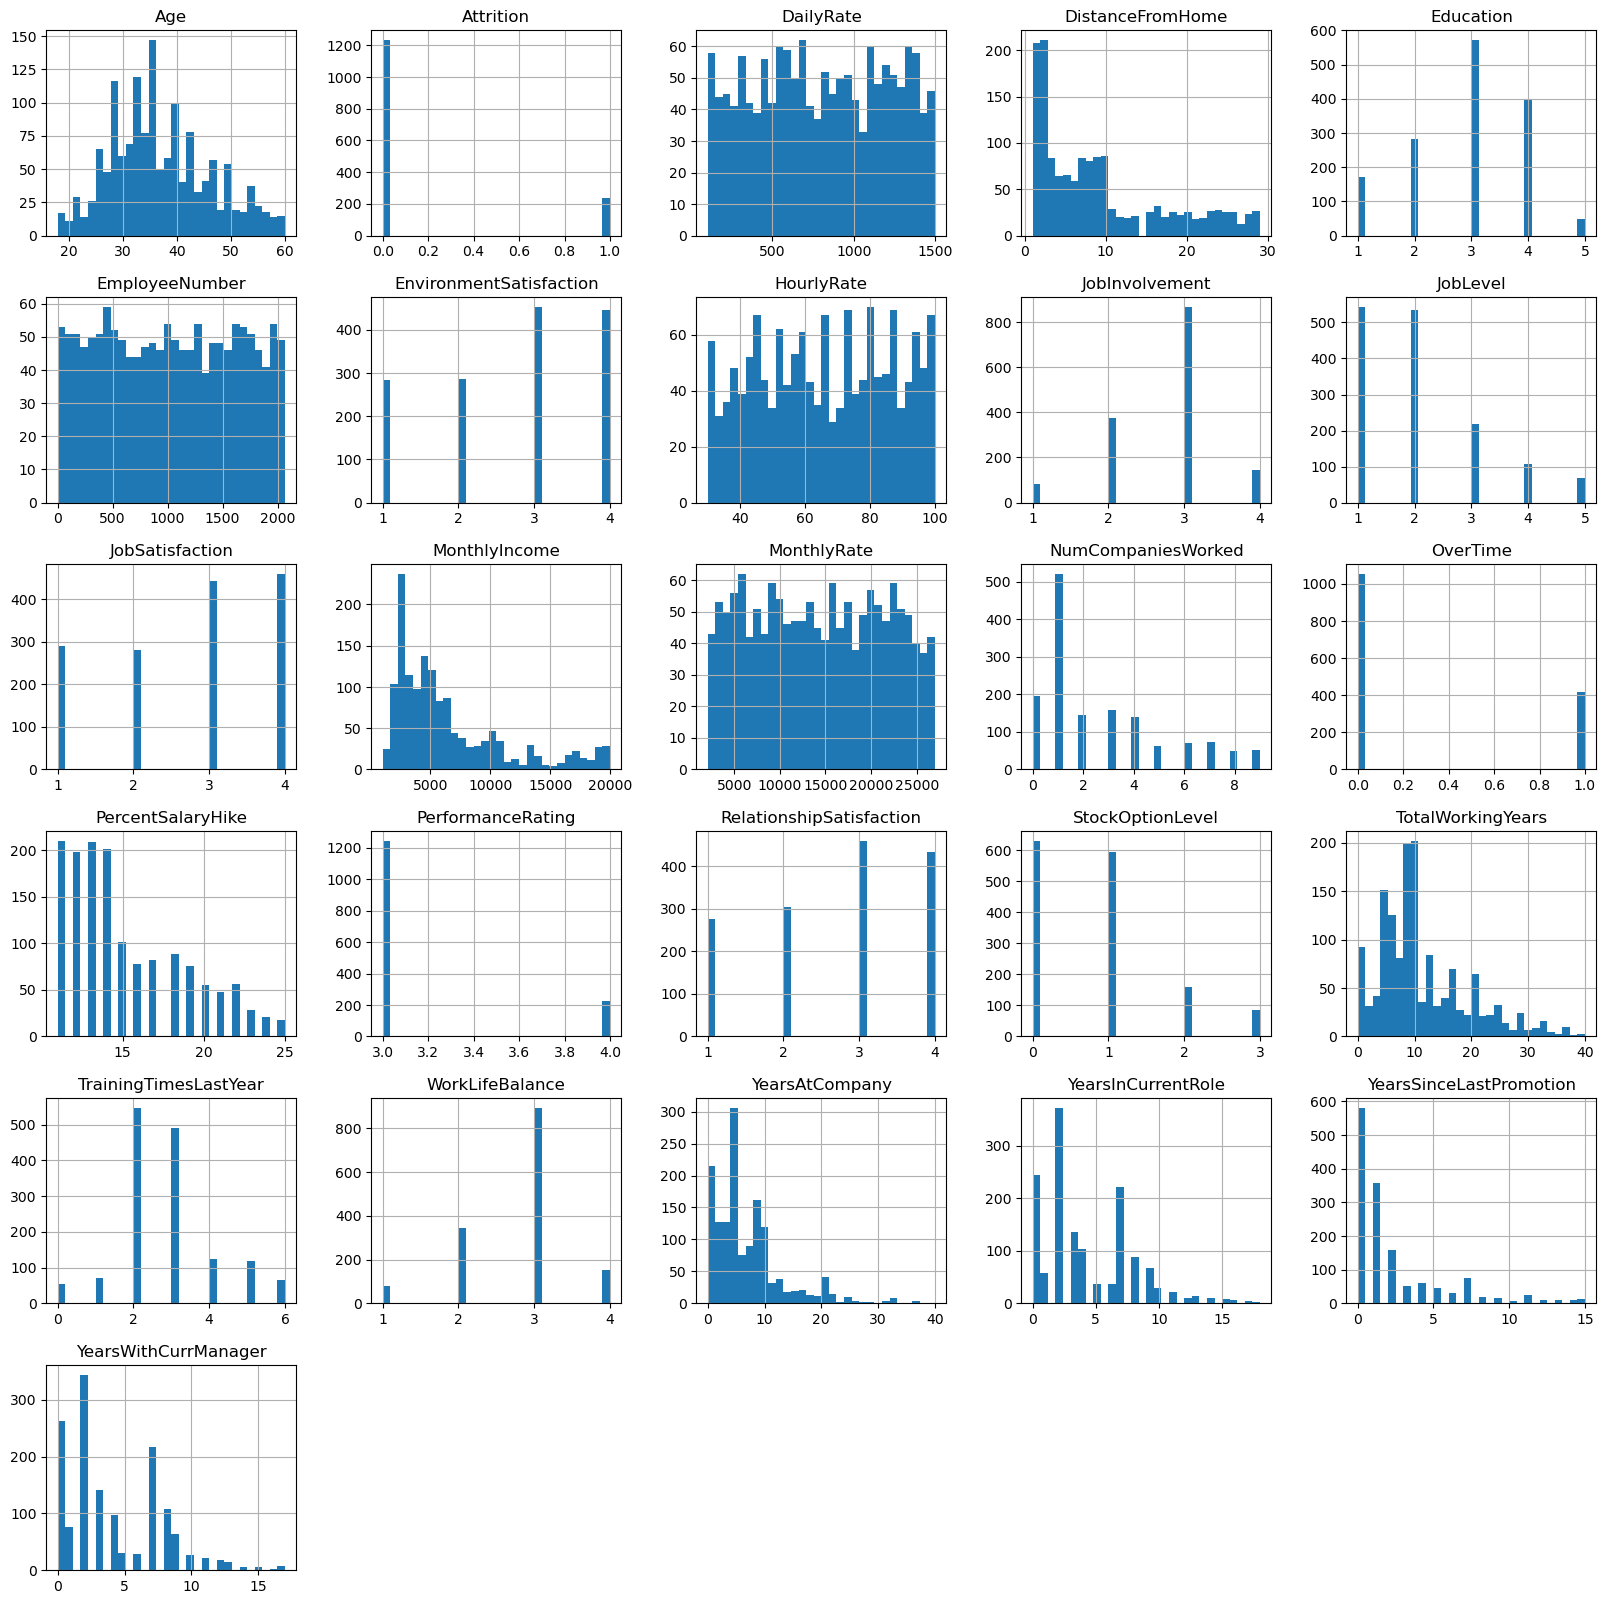

In [24]:
df.hist(bins=30, figsize= (20,20))

1. A large concentration of amployees have age around 31 to 36 years.
2. Most of the employees live close to the office.
3. Most of the employees have education level =3.
4. Most of the employees have been recently promoted.
5. Many employees have been working for the company for at least 8 to 10 years.

In [25]:
# let's drop 'EmployeeNumber' since it does not provide us with any necessary information.
df.drop('EmployeeNumber', axis=1, inplace = True)

In [26]:
# We can form two different dataframes for the people who stayed and those who left. This will help us to do a comparative study.
df_left = df[df['Attrition']==1]
df_stayed = df[df['Attrition']==0]

In [27]:
df_left.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.61,9.69,18.0,28.0,32.0,39.0,58.0
Attrition,237.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
DailyRate,237.0,750.36,401.90,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.63,8.45,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.84,1.01,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.46,1.17,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.57,20.10,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.52,0.77,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.64,0.94,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.47,1.12,1.0,1.0,3.0,3.0,4.0


In [28]:
df_stayed.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.56,8.89,18.0,31.0,36.0,43.0,60.0
Attrition,1233.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
DailyRate,1233.0,812.50,403.21,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.92,8.01,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.93,1.03,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.77,1.07,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.95,20.38,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.77,0.69,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.15,1.12,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.78,1.09,1.0,2.0,3.0,4.0,4.0


1. The mean age of ppl who left the company is comparatively lower than those who stayed.
2. Ppl who stayed with the company tend to live closer to the office.They have a significantly higher JobLevel and MonthlyIncome.
3. Those who continue to work also have worked with less NumCompaniesWorked implying that they have been quite stable in the past too.
4. Those who stays with the company, only 23% of them work OverTime whereas those who quit had a higher percentage of 54% OverTime contribution.
5. It is worth noting that there is not much difference in PercentSalaryHike and PerformanceRating between the two categories.
6. Majority of the ppl who stayed with the company were given the StockOptionLevel and their mean TotalWorkingYears is also higher.
7. Those who satyed have been comparatively for a period have been in the current role(YearsInCurrentRole).

In [29]:
#To find the percentage of how many of those who continued with the company did OverTime
((df_stayed['OverTime'].value_counts())/(df_stayed['OverTime'].count())*100).round(2)

0    76.56
1    23.44
Name: OverTime, dtype: float64

In [30]:
((df_left['OverTime'].value_counts())/(df_left['OverTime'].count())*100).round(2)

1    53.59
0    46.41
Name: OverTime, dtype: float64

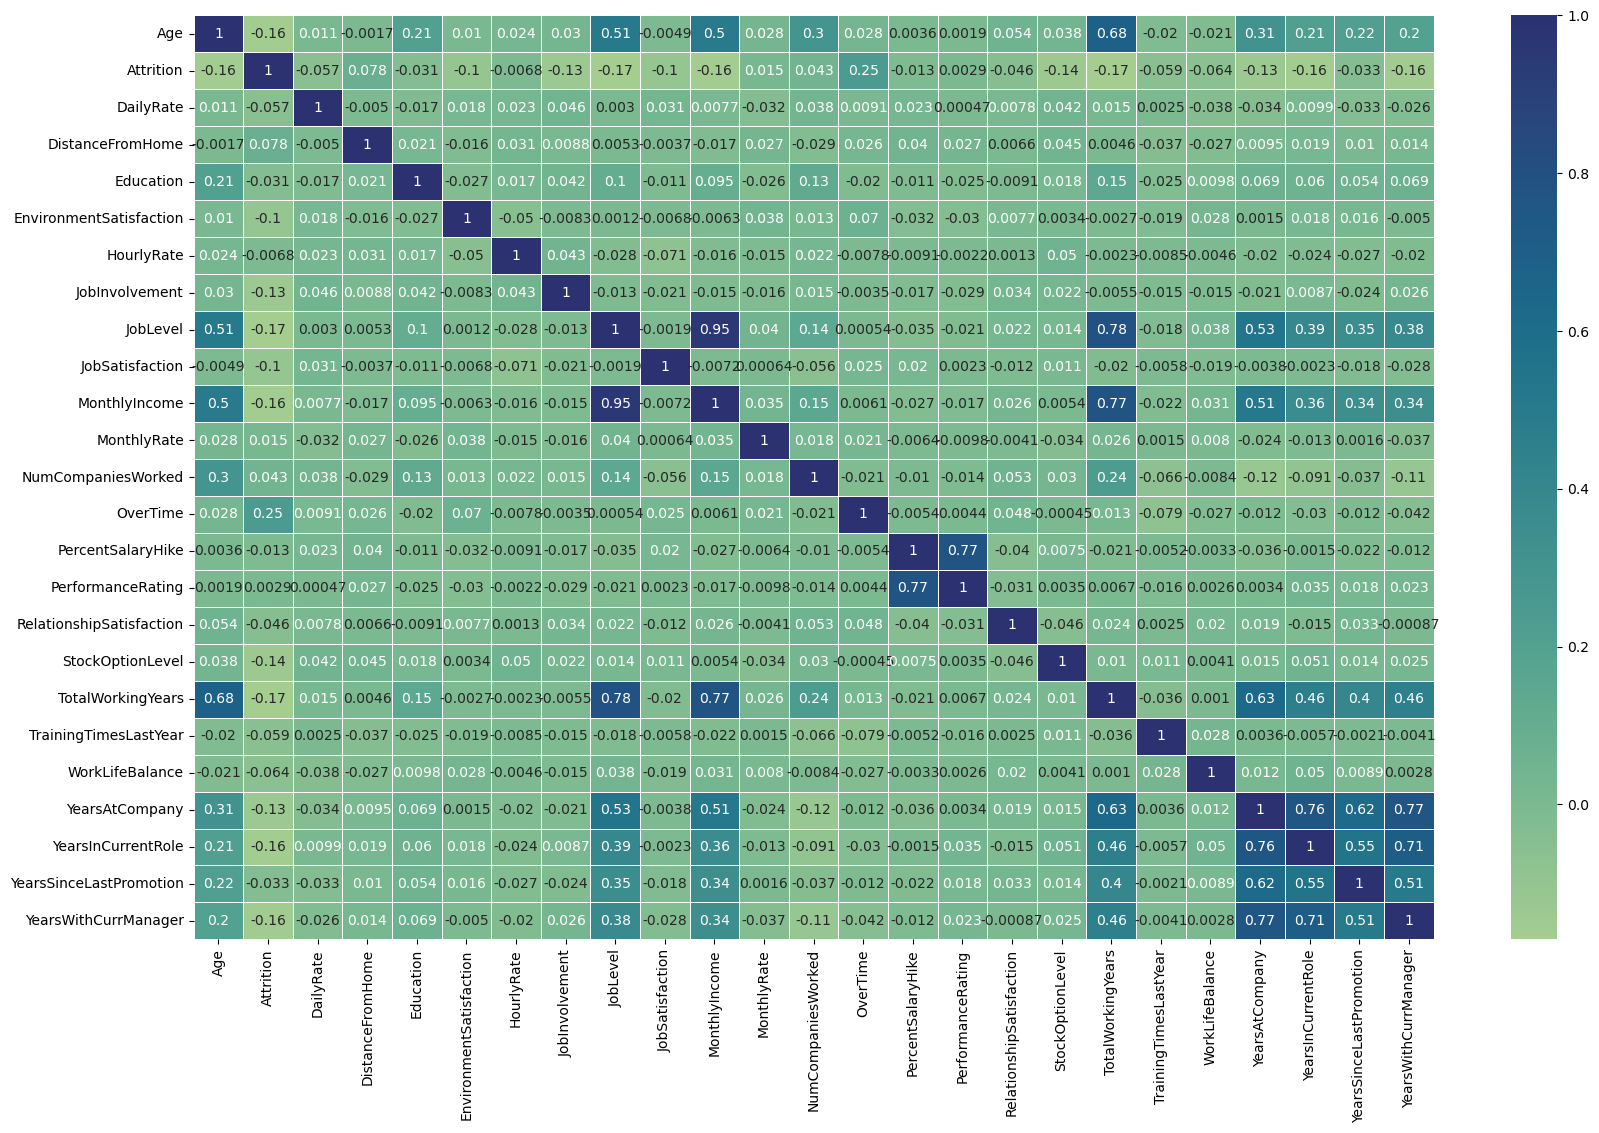

In [31]:
# Draw a heatmap to show correlations between different attributes and deduce inferences.
plt.figure(figsize=[20,12])
hm = sns.heatmap(df.corr(), linewidth = 0.5, cmap = 'crest', annot = True)

1. JobLevel and MonthlyIncome has a strong correlation.
2. TotalWorkingYears have a high correlation with the Age, JobLevel and MonthlyIncome.
3. Similarly,YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager also have a high correlation amongst each other.

<Axes: xlabel='JobLevel', ylabel='count'>

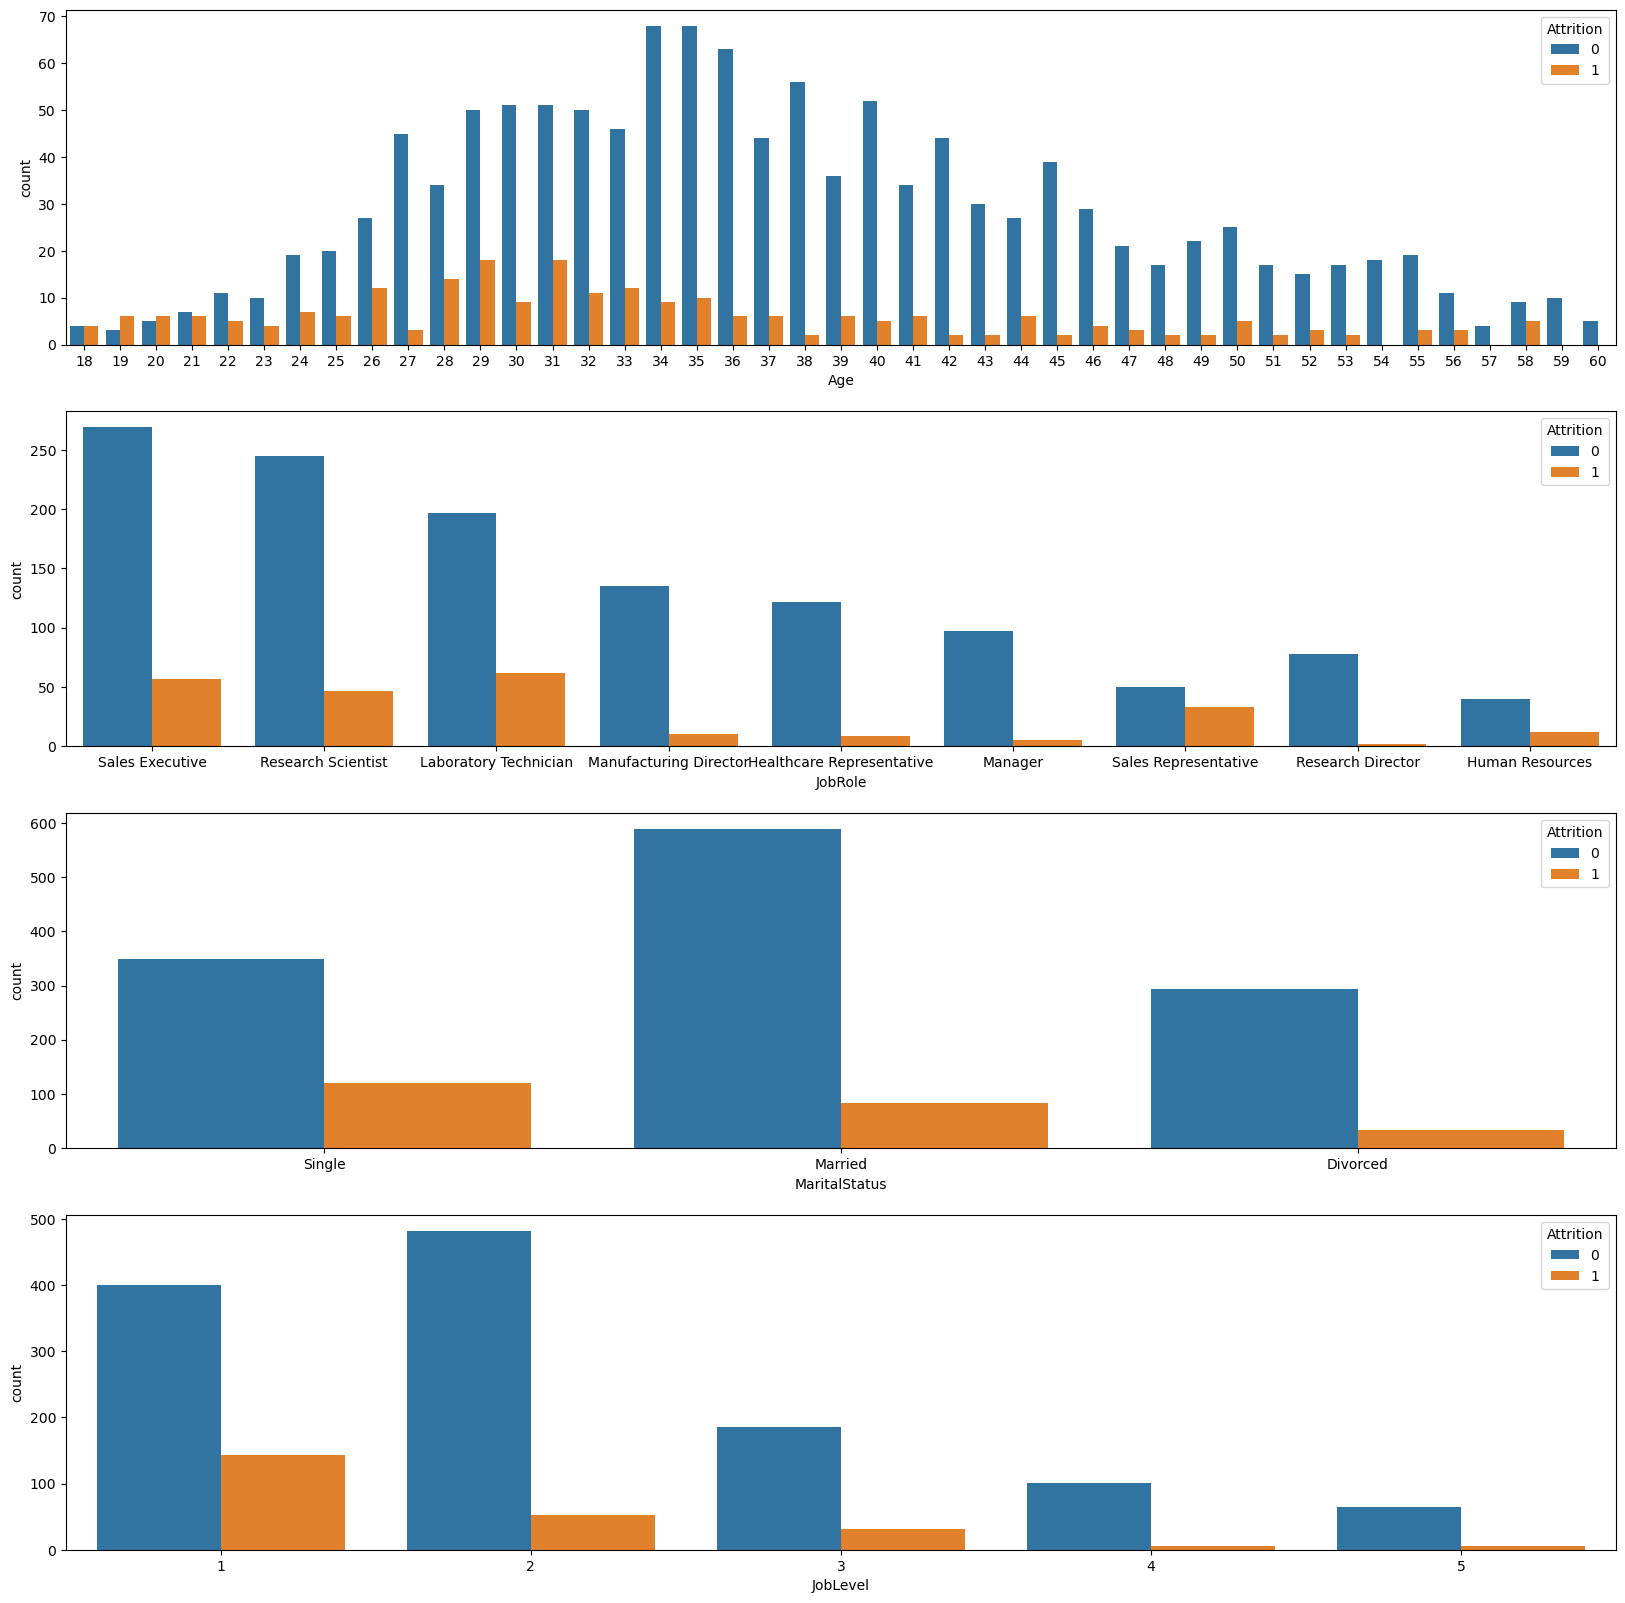

In [32]:
# Draw count plots of different attributes with 'Attrition' as hue
#With the subplot() function you can draw multiple plots in one figure
#The subplot() function takes three arguments that describes the layout of the figure.
#The layout is organized in rows and columns, which are represented by the first and second argument.
#The third argument represents the index of the current plot.
# Here (413) represents 4 rows, 1 column and the index no. 3
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x='Age',hue='Attrition', data= df)
plt.subplot(412)
sns.countplot(x= 'JobRole', hue= 'Attrition', data= df)
plt.subplot(413)
sns.countplot(x= 'MaritalStatus', hue='Attrition', data= df)
plt.subplot(414)
sns.countplot(x='JobLevel', hue = 'Attrition', data= df)

1. The hue tells us that ORANGE represents those who Left and BLUE represents those who STAYED.
2. There's a high attrition between 26 to 33 years of Age.
3. Ther's high attrition for few JobRole like Laboratory Technician, Sales Executive, Research Scientist and Sales Representative.
4. High numbers of Single individuals leave the job.
5. It is usually the people at lower (1, 2) JobLevel who show attrition.

In [33]:
#  Find the mean and max value of the MonthlyIncome
print(df['MonthlyIncome'].mean())
df['MonthlyIncome'].max()

6502.931292517007


19999

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

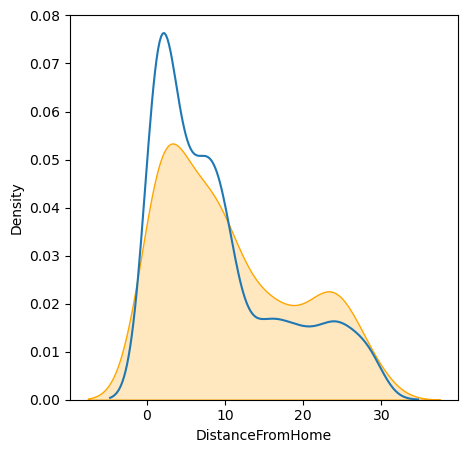

In [34]:
# Let's plot kdeplot to find out the DistanceFromHome of those who Left as compared to all of the employees
# Kernel Density Estimator is used to visualize the probability density of a continuous variable
plt.figure(figsize= [5,5])
sns.kdeplot(df['DistanceFromHome'])
sns.kdeplot(df_left['DistanceFromHome'], fill= True, color='orange')

Many of those who Left the job were staying at a large distance from office.

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

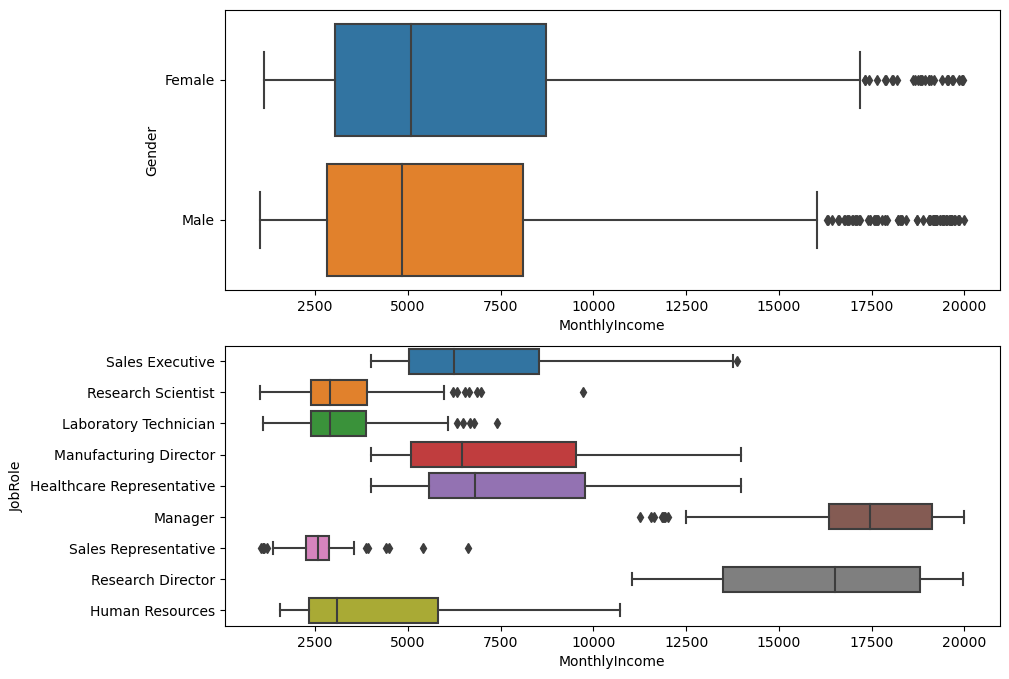

In [35]:
# Let's see the visualization through a boxplot
plt.figure(figsize= (10,8))
plt.subplot(211)
sns.boxplot(x= 'MonthlyIncome',y= 'Gender', data= df)
plt.subplot(212)
sns.boxplot(x='MonthlyIncome', y='JobRole', data = df)

Both the genders seem to have equal Q1 and median values but Q3 for males is higher indicating that few individuals have income higher than usual when compared to the other gender. Also, there appear to be lots of outliers.

In [36]:
df.describe(include='O')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,1043,961,606,882,326,673


In [37]:
# Let us create a dataset of all the categorical column
X_cat1 = df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
X_cat1.head(2)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married


In [39]:
type(X_cat1)

pandas.core.frame.DataFrame

In [40]:
# Perform OneHotEncoding on the categorical data

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_cat1 = ohe.fit_transform(X_cat1).toarray()

In [41]:

type(X_cat1)

numpy.ndarray

In [42]:
X_cat1 = pd.DataFrame(X_cat1)

In [43]:
type(X_cat1)

pandas.core.frame.DataFrame

In [44]:
X_cat1.head(4)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [45]:
# Form a new dataframe with only numerical values. Also EXCLUDE the TARGET column
X_numerical = df.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Attrition'], axis=1)

In [46]:
# Verify the dataframe
X_numerical.head(4).T

,0,1,2,3
Age,41,49,37,33
DailyRate,1102,279,1373,1392
DistanceFromHome,1,8,2,3
Education,2,1,2,4
EnvironmentSatisfaction,2,3,4,4
HourlyRate,94,61,92,56
JobInvolvement,3,2,2,3
JobLevel,2,2,1,1
JobSatisfaction,4,2,3,3
MonthlyIncome,5993,5130,2090,2909


In [47]:
# Concatenate the encoded X_cat and X_numerical to form the splitted X data
X = pd.concat([X_cat1, X_numerical], axis=1)

In [48]:
# Verify the data
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7


In [49]:
# Let us do Feature Scaling or normalization before splitting the data
# Let us do RobustScaling because we have lots of outliers in the data

from sklearn.preprocessing import RobustScaler
X.columns = X.columns.astype(str)
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [50]:
# Verify scaling
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.2       ,
        -0.33333333,  0.4       ],
       [ 0.        ,  1.        , -1.        , ...,  0.8       ,
         0.        ,  0.8       ],
       [ 0.        ,  0.        ,  0.        , ..., -0.6       ,
        -0.33333333, -0.6       ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.2       ,
        -0.33333333,  0.        ],
       [ 0.        ,  1.        , -1.        , ...,  0.6       ,
        -0.33333333,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.2       ]])

In [51]:
# Assign the target variable to Y
Y= df['Attrition']
Y.head(4)

0    1
1    0
2    1
3    0
Name: Attrition, dtype: int64

In [52]:
# Split the data into test and train data

from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.25, random_state= 42)

LOGISTIC REGRESSION CLASSIFIER MODEL

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [54]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
print('Logistic Regression Evaluation:','\n')
print('Test Accuracy: {} % '.format(accuracy_score(Y_test, Y_pred)*100))
print('Test Classification report','\n\n',classification_report(Y_test, Y_pred))
print('Confusion Matrix','\n\n',confusion_matrix(Y_test, Y_pred))

Logistic Regression Evaluation: 

Test Accuracy: 89.67391304347827 % 
Test Classification report 

               precision    recall  f1-score   support

           0       0.92      0.97      0.94       320
           1       0.66      0.44      0.53        48

    accuracy                           0.90       368
   macro avg       0.79      0.70      0.73       368
weighted avg       0.89      0.90      0.89       368

Confusion Matrix 

 [[309  11]
 [ 27  21]]


DECISION TREE CLASSIFIER

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)

In [67]:
print('Decision Tree Evaluation:','\n')
print('Accuracy Score {} %'.format(100*accuracy_score(Y_test,y_pred)))
print('Classification Report:','\n\n',classification_report(Y_test,y_pred))
print('Confusion Matrix:','\n', confusion_matrix(Y_test,y_pred))

Decision Tree Evaluation: 

Accuracy Score 79.07608695652173 %
Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.86      0.88       320
           1       0.25      0.31      0.28        48

    accuracy                           0.79       368
   macro avg       0.57      0.59      0.58       368
weighted avg       0.81      0.79      0.80       368

Confusion Matrix: 
 [[276  44]
 [ 33  15]]


RANDOM FOREST CLASSIFIER

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [69]:
y_pred =rf.predict(X_test)
print('Random Forest Classifier','\n')
print('Accuracy Score {} %'.format(100*accuracy_score(Y_test,y_pred)))
print('Classification Report:','\n\n',classification_report(Y_test,y_pred))
print('Confusion Matrix:','\n',confusion_matrix(Y_test,y_pred))

Random Forest Classifier 

Accuracy Score 87.22826086956522 %
Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.57      0.08      0.15        48

    accuracy                           0.87       368
   macro avg       0.72      0.54      0.54       368
weighted avg       0.84      0.87      0.83       368

Confusion Matrix: 
 [[317   3]
 [ 44   4]]


In [76]:
# Now let us give the no. of estimators as per our choice so that more number of trees are formed

rf_model = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state= 42)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [77]:
y_pred= rf_model.predict(X_test)
print('Classification Report:','\n\n',classification_report(Y_test,y_pred))
print('Confusion Matrix:','\n',confusion_matrix(Y_test,y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.67      0.08      0.15        48

    accuracy                           0.88       368
   macro avg       0.77      0.54      0.54       368
weighted avg       0.85      0.88      0.83       368

Confusion Matrix: 
 [[318   2]
 [ 44   4]]


In [79]:
ytrain_pred = rf_model.predict(X_train)
print('Classification Report:','\n\n',classification_report(Y_train,ytrain_pred))
print('Confusion Matrix:','\n',confusion_matrix(Y_train,ytrain_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      0.99      0.99       189

    accuracy                           1.00      1102
   macro avg       1.00      0.99      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix: 
 [[913   0]
 [  2 187]]


When we compare the 3 models we realised that the Logistic Regression Classifier has performed the best among the three models. It has the best f1 score for both the classes.

In [ ]:
Glad to gain more skills :)